#### Start by importing 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from ground_obs import data_io
from ground_obs import blend_calc_lib
from ground_obs import blend_calc
from ground_obs import plot

In [3]:
# If I remember correctly, this is reading in a text file of calculations so that I could plot the results

In [5]:
rv_frac_df = pd.read_csv('LTT1445_R300000.txt')

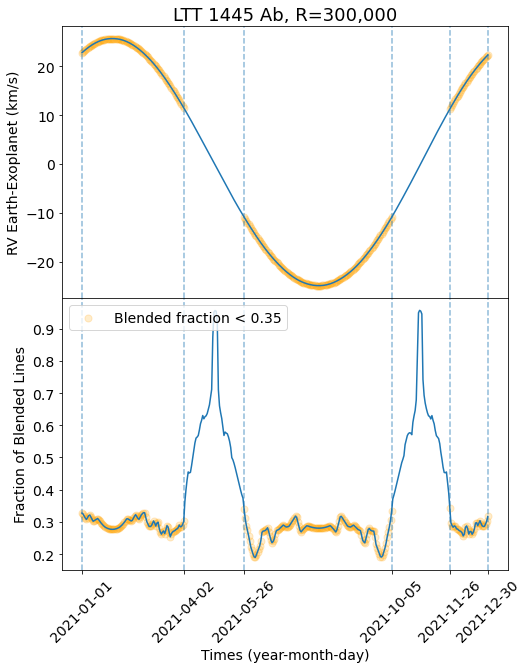

In [6]:
plot.subplot(rv_frac_df, 'LTT 1445 Ab, R=300,000', preferred_range=[0.35])

In [7]:
# Specify the names of the files with the telluric spectrum and the exoplanet spectrum
telluric_spec_file ='Atm_Transmission_Kurucz_2005.txt'
exo_spec_file = 'O2_1E6.txt'

In [8]:
# Use data_io to find the filepath to, and load in, the two spectra
tel_spec_df, exo_spec_df = data_io.load_data(data_io.get_data_file_path(telluric_spec_file), data_io.get_data_file_path(exo_spec_file))

In [9]:
# Calculate the relative rv between the Earth and an exoplanet within a given range of observation dates
rv_df = blend_calc.rv('LTT1445',2.11, obstime_range=['2020-08-07', '2021-03-01'], obsloc='Las Campanas Observatory')

ImportError: Solar system JPL ephemeris calculations require the jplephem package (https://pypi.org/project/jplephem/)

In [17]:
# Calculate the corresponding fraction of blended spectra lines for given telluric and exoplanet spectra
# at a given resolution and within a given wavelength range
rv_frac_df = blend_calc.rv_blended_frac(rv_df, tel_spec_df, exo_spec_df, resolution=np.array([10**6]), wl_range=[750, 780], exozeropt_shift=-83.503)

Starting code for O2 band near 765.0 nm...
Starting blend frac calculations for R =1000000
Execution time in hours: 0.07882278222888191


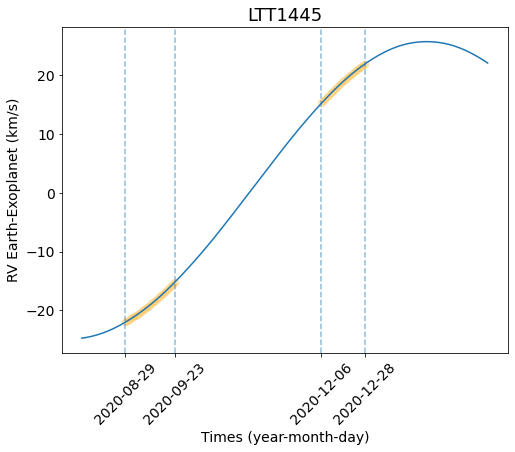

In [18]:
# Make some plots
plot.rv_curve(rv_frac_df, 'LTT1445', preferred_range=[15,22],frac=False)

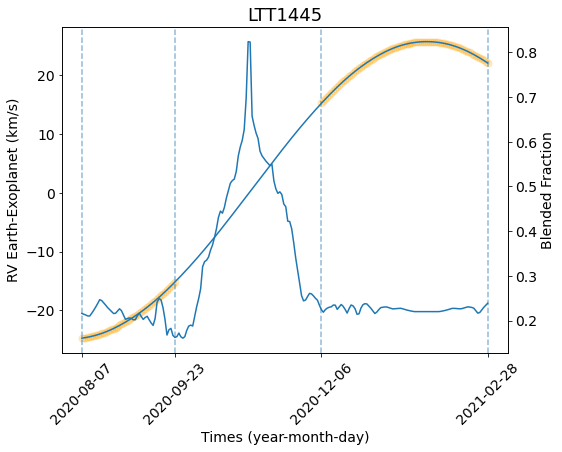

In [19]:
plot.rv_curve(rv_frac_df, 'LTT1445', preferred_range=[15,30])

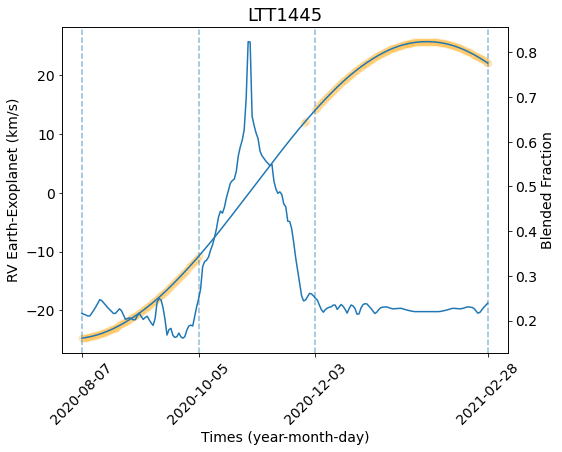

In [20]:
plot.rv_curve(rv_frac_df, 'LTT1445', preferred_range=[0.25])

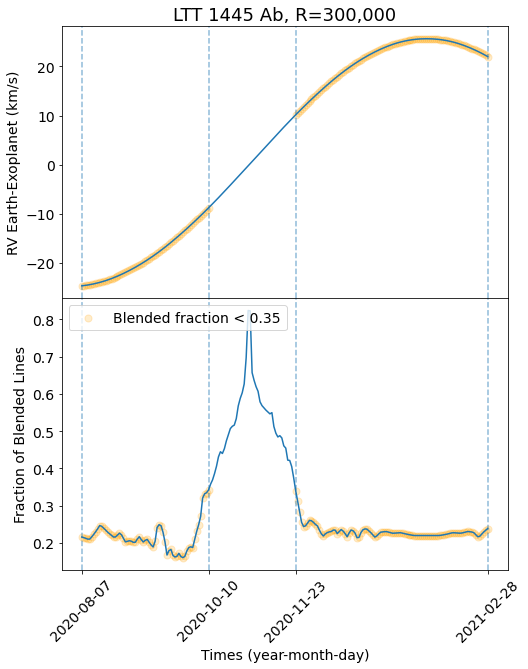

In [21]:
plot.subplot(rv_frac_df, 'LTT 1445 Ab, R=300,000', preferred_range=[0.35])


In [13]:
rv_frac_df.to_csv('LTT1445_R300000.txt')